문제) 'auto-mpg.csv' 파일에 대하여 EDA를 수행 후 선형 회귀 모델을 구현

In [1]:
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LinearRegression

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras import optimizers

In [2]:
# IPython 디스플레이 설정 - 출력할 열의 개수 한도 늘리기
pd.set_option( 'display.max_columns', 10 )

# 단순 선형 회귀 모델

## 1. 데이터 준비

In [3]:
# csv파일 데이터프레임으로 변환
raw_df = pd.read_csv( 'auto-mpg.csv', header = None, encoding = 'utf-8' )

In [4]:
# 열이름 지정
raw_df.columns = [ 'mpg', 'cylinders', 'displacement', 'horsepower', 'weight',
               'acceleration', 'model', 'origin', 'name' ]

In [5]:
raw_df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model,origin,name
0,18.0,8,307.0,130.0,3504.0,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693.0,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436.0,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433.0,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449.0,10.5,70,1,ford torino


In [6]:
df = raw_df.copy()

In [7]:
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model,origin,name
0,18.0,8,307.0,130.0,3504.0,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693.0,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436.0,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433.0,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449.0,10.5,70,1,ford torino


### 'name'변수 제거

In [8]:
df.pop( 'name' )

0      chevrolet chevelle malibu
1              buick skylark 320
2             plymouth satellite
3                  amc rebel sst
4                    ford torino
                 ...            
393              ford mustang gl
394                    vw pickup
395                dodge rampage
396                  ford ranger
397                   chevy s-10
Name: name, Length: 398, dtype: object

In [9]:
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model,origin
0,18.0,8,307.0,130.0,3504.0,12.0,70,1
1,15.0,8,350.0,165.0,3693.0,11.5,70,1
2,18.0,8,318.0,150.0,3436.0,11.0,70,1
3,16.0,8,304.0,150.0,3433.0,12.0,70,1
4,17.0,8,302.0,140.0,3449.0,10.5,70,1


## 2. 데이터 탐색

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    398 non-null    object 
 4   weight        398 non-null    float64
 5   acceleration  398 non-null    float64
 6   model         398 non-null    int64  
 7   origin        398 non-null    int64  
dtypes: float64(4), int64(3), object(1)
memory usage: 25.0+ KB


In [11]:
df.describe()

,mpg,cylinders,displacement,weight,acceleration,model,origin
count,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,2970.424623,15.568090,76.010050,1.572864
std,7.815984,1.701004,104.269838,846.841774,2.757689,3.697627,0.802055
min,9.000000,3.000000,68.000000,1613.000000,8.000000,70.000000,1.000000
25%,17.500000,4.000000,104.250000,2223.750000,13.825000,73.000000,1.000000
50%,23.000000,4.000000,148.500000,2803.500000,15.500000,76.000000,1.000000
75%,29.000000,8.000000,262.000000,3608.000000,17.175000,79.000000,2.000000
max,46.600000,8.000000,455.000000,5140.000000,24.800000,82.000000,3.000000


#### 엔진 출력인 'horsepower' 변수가 포함되어 있지 않으므로 자료형 변경

In [12]:
df[ 'horsepower' ].unique()

array(['130.0', '165.0', '150.0', '140.0', '198.0', '220.0', '215.0',
       '225.0', '190.0', '170.0', '160.0', '95.00', '97.00', '85.00',
       '88.00', '46.00', '87.00', '90.00', '113.0', '200.0', '210.0',
       '193.0', '?', '100.0', '105.0', '175.0', '153.0', '180.0', '110.0',
       '72.00', '86.00', '70.00', '76.00', '65.00', '69.00', '60.00',
       '80.00', '54.00', '208.0', '155.0', '112.0', '92.00', '145.0',
       '137.0', '158.0', '167.0', '94.00', '107.0', '230.0', '49.00',
       '75.00', '91.00', '122.0', '67.00', '83.00', '78.00', '52.00',
       '61.00', '93.00', '148.0', '129.0', '96.00', '71.00', '98.00',
       '115.0', '53.00', '81.00', '79.00', '120.0', '152.0', '102.0',
       '108.0', '68.00', '58.00', '149.0', '89.00', '63.00', '48.00',
       '66.00', '139.0', '103.0', '125.0', '133.0', '138.0', '135.0',
       '142.0', '77.00', '62.00', '132.0', '84.00', '64.00', '74.00',
       '116.0', '82.00'], dtype=object)

In [13]:
df[ 'horsepower' ].replace( '?', np.nan, inplace = True )
df.dropna( subset = [ 'horsepower' ], axis = 0, inplace = True )
df[ 'horsepower' ].unique()

array(['130.0', '165.0', '150.0', '140.0', '198.0', '220.0', '215.0',
       '225.0', '190.0', '170.0', '160.0', '95.00', '97.00', '85.00',
       '88.00', '46.00', '87.00', '90.00', '113.0', '200.0', '210.0',
       '193.0', '100.0', '105.0', '175.0', '153.0', '180.0', '110.0',
       '72.00', '86.00', '70.00', '76.00', '65.00', '69.00', '60.00',
       '80.00', '54.00', '208.0', '155.0', '112.0', '92.00', '145.0',
       '137.0', '158.0', '167.0', '94.00', '107.0', '230.0', '49.00',
       '75.00', '91.00', '122.0', '67.00', '83.00', '78.00', '52.00',
       '61.00', '93.00', '148.0', '129.0', '96.00', '71.00', '98.00',
       '115.0', '53.00', '81.00', '79.00', '120.0', '152.0', '102.0',
       '108.0', '68.00', '58.00', '149.0', '89.00', '63.00', '48.00',
       '66.00', '139.0', '103.0', '125.0', '133.0', '138.0', '135.0',
       '142.0', '77.00', '62.00', '132.0', '84.00', '64.00', '74.00',
       '116.0', '82.00'], dtype=object)

In [14]:
df[ 'horsepower' ] = df[ 'horsepower' ].astype( 'float' )

In [15]:
origin = df.pop( 'origin' )

In [16]:
df['USA'] = ( origin == 1 ) * 1.0
df['Europe'] = ( origin == 2 ) * 1.0
df['Japan'] = ( origin == 3 ) * 1.0

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 392 entries, 0 to 397
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           392 non-null    float64
 1   cylinders     392 non-null    int64  
 2   displacement  392 non-null    float64
 3   horsepower    392 non-null    float64
 4   weight        392 non-null    float64
 5   acceleration  392 non-null    float64
 6   model         392 non-null    int64  
 7   USA           392 non-null    float64
 8   Europe        392 non-null    float64
 9   Japan         392 non-null    float64
dtypes: float64(8), int64(2)
memory usage: 33.7 KB


In [18]:
df.describe()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model,USA,Europe,Japan
count,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000
mean,23.445918,5.471939,194.411990,104.469388,2977.584184,15.541327,75.979592,0.625000,0.173469,0.201531
std,7.805007,1.705783,104.644004,38.491160,849.402560,2.758864,3.683737,0.484742,0.379136,0.401656
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000,0.000000,0.000000,0.000000
25%,17.000000,4.000000,105.000000,75.000000,2225.250000,13.775000,73.000000,0.000000,0.000000,0.000000
50%,22.750000,4.000000,151.000000,93.500000,2803.500000,15.500000,76.000000,1.000000,0.000000,0.000000
75%,29.000000,8.000000,275.750000,126.000000,3614.750000,17.025000,79.000000,1.000000,0.000000,0.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000,1.000000,1.000000,1.000000


### 훈련용 데이터 셋과 테스트용 데이터 셋 분리

In [19]:
train_df = df.sample( frac = 0.8, random_state = 0 )
test_df = df.drop( train_df.index )

In [20]:
print( 'train data 개수 : {:5d}'.format( len( train_df ) ) )
print( 'test data 개수 : {:5d}'.format( len( test_df ) ) )

train data 개수 :   314
test data 개수 :    78


In [21]:
# 학습용 데이터
train_df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model,USA,Europe,Japan
146,28.0,4,90.0,75.0,2125.0,14.5,74,1.0,0.0,0.0
282,22.3,4,140.0,88.0,2890.0,17.3,79,1.0,0.0,0.0
69,12.0,8,350.0,160.0,4456.0,13.5,72,1.0,0.0,0.0
378,38.0,4,105.0,63.0,2125.0,14.7,82,1.0,0.0,0.0
331,33.8,4,97.0,67.0,2145.0,18.0,80,0.0,0.0,1.0


In [22]:
# 테스트용 데이터
test_df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model,USA,Europe,Japan
9,15.0,8,390.0,190.0,3850.0,8.5,70,1.0,0.0,0.0
25,10.0,8,360.0,215.0,4615.0,14.0,70,1.0,0.0,0.0
28,9.0,8,304.0,193.0,4732.0,18.5,70,1.0,0.0,0.0
31,25.0,4,113.0,95.0,2228.0,14.0,71,0.0,0.0,1.0
33,19.0,6,232.0,100.0,2634.0,13.0,71,1.0,0.0,0.0


## 3. 속성 선택

- 단순 선형 회귀 모델 변수로 사용할 후보 변수를 선택한다.
- 예측 목표 변수인 종속 변수( y )가 될 'mpg' 변수와 독립 변수( X )로 사용할 후보로 3개 변수(  'cylinders', 'horsepower', 'weight' )를 포함

In [23]:
df = train_df[ [ 'mpg', 'cylinders', 'horsepower', 'weight' ] ]
df.head()

,mpg,cylinders,horsepower,weight
146,28.0,4,75.0,2125.0
282,22.3,4,88.0,2890.0
69,12.0,8,160.0,4456.0
378,38.0,4,63.0,2125.0
331,33.8,4,67.0,2145.0


In [24]:
df.describe()

,mpg,cylinders,horsepower,weight
count,314.000000,314.000000,314.000000,314.000000
mean,23.310510,5.477707,104.869427,2990.251592
std,7.728652,1.699788,38.096214,843.898596
min,10.000000,3.000000,46.000000,1649.000000
25%,17.000000,4.000000,76.250000,2256.500000
50%,22.000000,4.000000,94.500000,2822.500000
75%,28.950000,8.000000,128.000000,3608.000000
max,46.600000,8.000000,225.000000,5140.000000


### 종속 변수 y인 'mpg'( 연비 )와 다른 변수간의 선형관계 파악을 위한 시각화

In [25]:
df.corr()

,mpg,cylinders,horsepower,weight
mpg,1.000000,-0.770246,-0.764545,-0.819802
cylinders,-0.770246,1.000000,0.844247,0.893869
horsepower,-0.764545,0.844247,1.000000,0.857417
weight,-0.819802,0.893869,0.857417,1.000000


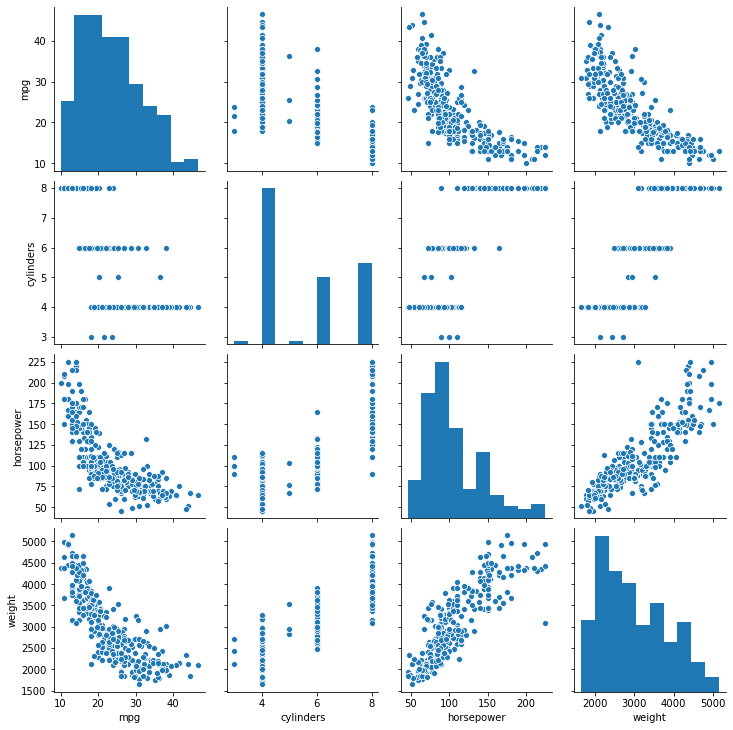

In [26]:
sns.pairplot( df )

### 산점도를 통해 'mpg' 변수와 선형관계를 보이는 'horsepower' 변수와 'weight' 변수를 독립변수 X로 선택하는 것을 고려한다.

### 정규화

In [27]:
df_stats = df.describe()
df_stats.pop( "mpg" )
df_stats = df_stats.transpose()
df_stats

,count,mean,std,min,25%,50%,75%,max
cylinders,314.0,5.477707,1.699788,3.0,4.00,4.0,8.0,8.0
horsepower,314.0,104.869427,38.096214,46.0,76.25,94.5,128.0,225.0
weight,314.0,2990.251592,843.898596,1649.0,2256.50,2822.5,3608.0,5140.0


### y( Label ) 분리

In [28]:
y_train = train_df.pop( 'mpg' )
y_test = test_df.pop( 'mpg' )

In [29]:
print( len( y_train ), len( y_test ) )

314 78


In [30]:
def normalization( x ):
  return ( x - df_stats[ 'mean' ] ) / df_stats[ 'std' ]

normed_train_df = normalization( train_df )
normed_test_df = normalization( test_df )

## 4. 모델 학습

### 훈련 / 테스트 데이터 NumPy  배열로 변환

In [31]:
X_train = np.asarray( normed_train_df[ [ 'weight' ] ] ) # 학습용 독립 변수 X를 'weight' 변수로 할 때 사용
X_test = np.asarray( normed_test_df[ [ 'weight' ] ] )

In [32]:
print( len( X_train ), len( X_test ) )

314 78


In [33]:
print( len( y_train ), len( y_test ) )

314 78


### Scikit-learn 사용

In [34]:
model = LinearRegression()
model.fit( X_train, y_train )

LinearRegression()

In [35]:
r_square = model.score( X_test, y_test ) # 결정계수( R-제곱 ) 계산
print( '결정계수( R-제곱 ) : {}'.format( r_square ) )

결정계수( R-제곱 ) : 0.7651284060854129


In [36]:
print( '회귀식의 기울기( W ) : {}'.format( model.coef_ ) )
print( '회귀식의 절편( b ) : {}'.format( model.intercept_ ) )

회귀식의 기울기( W ) : [-6.33596229]
회귀식의 절편( b ) : 23.31050955414013


In [37]:
y_predict = model.predict( X_test )

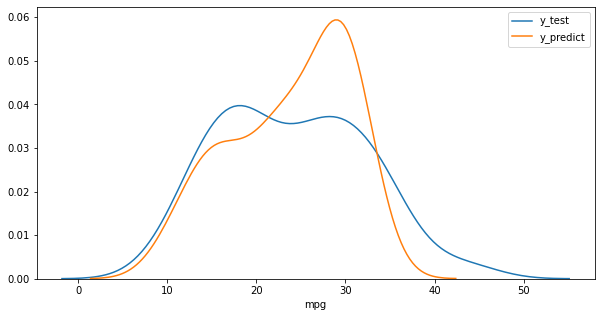

In [38]:
plt.figure( figsize = ( 10, 5 ) )
ax1 = sns.distplot( y_test, hist = False, label = 'y_test' )
ax2 = sns.distplot( y_predict, hist = False, label = 'y_predict', ax = ax1 )

plt.show()

### Keras 사용

In [39]:
X_train = np.array( X_train )
X_test = np.array( X_test )
y_train = np.array( y_train )
y_test = np.array( y_test )

In [40]:
model = Sequential()
model.add( Dense( 1, input_dim = 1, activation = 'linear' ) )
sgd = optimizers.SGD( lr = 0.0001 )
model.compile( optimizer = sgd ,loss = 'mse', metrics = [ 'mse', 'mae' ] )
history = model.fit( X_train, y_train, batch_size = 1, epochs = 300, validation_split = 0.2 )

Train on 251 samples, validate on 63 samples
Epoch 1/300
251/251 [==============================] - 1s 4ms/sample - loss: 587.2009 - mse: 587.2009 - mae: 22.6469 - val_loss: 583.9406 - val_mse: 583.9408 - val_mae: 22.5783
Epoch 2/300
251/251 [==============================] - 0s 2ms/sample - loss: 532.9023 - mse: 532.9023 - mae: 21.5373 - val_loss: 531.2729 - val_mse: 531.2729 - val_mae: 21.5046
Epoch 3/300
251/251 [==============================] - 1s 2ms/sample - loss: 483.8016 - mse: 483.8013 - mae: 20.4764 - val_loss: 483.5906 - val_mse: 483.5905 - val_mae: 20.4838
Epoch 4/300
251/251 [==============================] - 1s 3ms/sample - loss: 439.4081 - mse: 439.4081 - mae: 19.4679 - val_loss: 440.4117 - val_mse: 440.4117 - val_mae: 19.5133
Epoch 5/300
251/251 [==============================] - 0s 2ms/sample - loss: 399.2714 - mse: 399.2715 - mae: 18.5072 - val_loss: 401.3202 - val_mse: 401.3202 - val_mae: 18.5906
Epoch 6/300
251/251 [==============================] - 0s 1ms/sample -

251/251 [==============================] - 0s 1ms/sample - loss: 25.1612 - mse: 25.1612 - mae: 3.5693 - val_loss: 27.4867 - val_mse: 27.4867 - val_mae: 3.9235
Epoch 48/300
251/251 [==============================] - 1s 2ms/sample - loss: 24.6285 - mse: 24.6285 - mae: 3.5338 - val_loss: 26.8437 - val_mse: 26.8437 - val_mae: 3.8746
Epoch 49/300
251/251 [==============================] - 0s 1ms/sample - loss: 24.1458 - mse: 24.1458 - mae: 3.5045 - val_loss: 26.2552 - val_mse: 26.2552 - val_mae: 3.8282
Epoch 50/300
251/251 [==============================] - 0s 1ms/sample - loss: 23.7101 - mse: 23.7101 - mae: 3.4810 - val_loss: 25.7191 - val_mse: 25.7191 - val_mae: 3.7842
Epoch 51/300
251/251 [==============================] - 0s 1ms/sample - loss: 23.3169 - mse: 23.3169 - mae: 3.4604 - val_loss: 25.2282 - val_mse: 25.2282 - val_mae: 3.7423
Epoch 52/300
251/251 [==============================] - 1s 2ms/sample - loss: 22.9613 - mse: 22.9613 - mae: 3.4402 - val_loss: 24.7784 - val_mse: 24.7784

Epoch 95/300
251/251 [==============================] - 0s 1ms/sample - loss: 19.6367 - mse: 19.6367 - mae: 3.3151 - val_loss: 19.6849 - val_mse: 19.6849 - val_mae: 3.4260
Epoch 96/300
251/251 [==============================] - 0s 1ms/sample - loss: 19.6325 - mse: 19.6325 - mae: 3.3149 - val_loss: 19.6686 - val_mse: 19.6686 - val_mae: 3.4263
Epoch 97/300
251/251 [==============================] - 0s 1ms/sample - loss: 19.6285 - mse: 19.6285 - mae: 3.3144 - val_loss: 19.6528 - val_mse: 19.6528 - val_mae: 3.4265
Epoch 98/300
251/251 [==============================] - 0s 1ms/sample - loss: 19.6251 - mse: 19.6251 - mae: 3.3151 - val_loss: 19.6382 - val_mse: 19.6382 - val_mae: 3.4267
Epoch 99/300
251/251 [==============================] - 0s 1ms/sample - loss: 19.6219 - mse: 19.6219 - mae: 3.3155 - val_loss: 19.6247 - val_mse: 19.6247 - val_mae: 3.4269
Epoch 100/300
251/251 [==============================] - 1s 3ms/sample - loss: 19.6190 - mse: 19.6190 - mae: 3.3166 - val_loss: 19.6120 - va

251/251 [==============================] - 1s 3ms/sample - loss: 19.5922 - mse: 19.5922 - mae: 3.3226 - val_loss: 19.4125 - val_mse: 19.4125 - val_mae: 3.4319
Epoch 143/300
251/251 [==============================] - 1s 3ms/sample - loss: 19.5922 - mse: 19.5922 - mae: 3.3231 - val_loss: 19.4115 - val_mse: 19.4115 - val_mae: 3.4320
Epoch 144/300
251/251 [==============================] - 1s 3ms/sample - loss: 19.5920 - mse: 19.5920 - mae: 3.3224 - val_loss: 19.4098 - val_mse: 19.4098 - val_mae: 3.4321
Epoch 145/300
251/251 [==============================] - 1s 2ms/sample - loss: 19.5921 - mse: 19.5921 - mae: 3.3229 - val_loss: 19.4086 - val_mse: 19.4086 - val_mae: 3.4322
Epoch 146/300
251/251 [==============================] - 1s 2ms/sample - loss: 19.5920 - mse: 19.5920 - mae: 3.3219 - val_loss: 19.4074 - val_mse: 19.4074 - val_mae: 3.4323
Epoch 147/300
251/251 [==============================] - 1s 2ms/sample - loss: 19.5920 - mse: 19.5920 - mae: 3.3228 - val_loss: 19.4064 - val_mse: 19

251/251 [==============================] - 0s 1ms/sample - loss: 19.5918 - mse: 19.5918 - mae: 3.3236 - val_loss: 19.3929 - val_mse: 19.3929 - val_mae: 3.4330
Epoch 190/300
251/251 [==============================] - 0s 2ms/sample - loss: 19.5918 - mse: 19.5918 - mae: 3.3249 - val_loss: 19.3925 - val_mse: 19.3925 - val_mae: 3.4330
Epoch 191/300
251/251 [==============================] - 0s 1ms/sample - loss: 19.5918 - mse: 19.5918 - mae: 3.3238 - val_loss: 19.3919 - val_mse: 19.3919 - val_mae: 3.4330
Epoch 192/300
251/251 [==============================] - 0s 1ms/sample - loss: 19.5918 - mse: 19.5918 - mae: 3.3243 - val_loss: 19.3914 - val_mse: 19.3914 - val_mae: 3.4330
Epoch 193/300
251/251 [==============================] - 0s 1ms/sample - loss: 19.5918 - mse: 19.5918 - mae: 3.3246 - val_loss: 19.3915 - val_mse: 19.3915 - val_mae: 3.4330
Epoch 194/300
251/251 [==============================] - 0s 1ms/sample - loss: 19.5918 - mse: 19.5918 - mae: 3.3242 - val_loss: 19.3914 - val_mse: 19

251/251 [==============================] - 0s 1ms/sample - loss: 19.5918 - mse: 19.5918 - mae: 3.3250 - val_loss: 19.3895 - val_mse: 19.3895 - val_mae: 3.4332
Epoch 237/300
251/251 [==============================] - 0s 1ms/sample - loss: 19.5918 - mse: 19.5918 - mae: 3.3243 - val_loss: 19.3898 - val_mse: 19.3898 - val_mae: 3.4332
Epoch 238/300
251/251 [==============================] - 1s 3ms/sample - loss: 19.5917 - mse: 19.5917 - mae: 3.3243 - val_loss: 19.3894 - val_mse: 19.3894 - val_mae: 3.4333
Epoch 239/300
251/251 [==============================] - 1s 3ms/sample - loss: 19.5918 - mse: 19.5918 - mae: 3.3246 - val_loss: 19.3894 - val_mse: 19.3894 - val_mae: 3.4332
Epoch 240/300
251/251 [==============================] - 1s 2ms/sample - loss: 19.5918 - mse: 19.5918 - mae: 3.3242 - val_loss: 19.3895 - val_mse: 19.3895 - val_mae: 3.4333
Epoch 241/300
251/251 [==============================] - 1s 2ms/sample - loss: 19.5917 - mse: 19.5917 - mae: 3.3250 - val_loss: 19.3900 - val_mse: 19

251/251 [==============================] - 0s 1ms/sample - loss: 19.5918 - mse: 19.5918 - mae: 3.3247 - val_loss: 19.3899 - val_mse: 19.3899 - val_mae: 3.4333
Epoch 284/300
251/251 [==============================] - 0s 1ms/sample - loss: 19.5918 - mse: 19.5918 - mae: 3.3244 - val_loss: 19.3897 - val_mse: 19.3897 - val_mae: 3.4333
Epoch 285/300
251/251 [==============================] - 0s 2ms/sample - loss: 19.5918 - mse: 19.5918 - mae: 3.3242 - val_loss: 19.3895 - val_mse: 19.3895 - val_mae: 3.4333
Epoch 286/300
251/251 [==============================] - 0s 1ms/sample - loss: 19.5918 - mse: 19.5918 - mae: 3.3253 - val_loss: 19.3898 - val_mse: 19.3898 - val_mae: 3.4333
Epoch 287/300
251/251 [==============================] - 0s 1ms/sample - loss: 19.5918 - mse: 19.5918 - mae: 3.3248 - val_loss: 19.3898 - val_mse: 19.3898 - val_mae: 3.4333
Epoch 288/300
251/251 [==============================] - 0s 1ms/sample - loss: 19.5917 - mse: 19.5917 - mae: 3.3243 - val_loss: 19.3892 - val_mse: 19

In [41]:
history_dict = history.history
loss = history_dict[ 'loss' ]
val_loss = history_dict[ 'val_loss' ]

epochs = range( 1, len( loss ) + 1 )

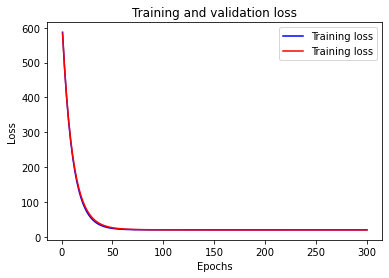

In [42]:
plt.plot( epochs, loss, 'b', label = 'Training loss' )
plt.plot( epochs, val_loss, 'r', label = 'Training loss' )
plt.title( 'Training and validation loss' )
plt.xlabel( 'Epochs' )
plt.ylabel( 'Loss' )
plt.legend()

plt.show()

In [44]:
hist = pd.DataFrame(history.history)
hist[ 'epoch' ] = history.epoch
hist.tail()

,loss,mse,mae,val_loss,val_mse,val_mae,epoch
295,19.591810,19.591805,3.324229,19.388282,19.388283,3.433359,295
296,19.591786,19.591782,3.324180,19.387970,19.387966,3.433371,296
297,19.591772,19.591770,3.325022,19.388249,19.388252,3.433331,297
298,19.591794,19.591793,3.325142,19.388227,19.388227,3.433302,298
299,19.591732,19.591736,3.324947,19.388795,19.388790,3.433285,299


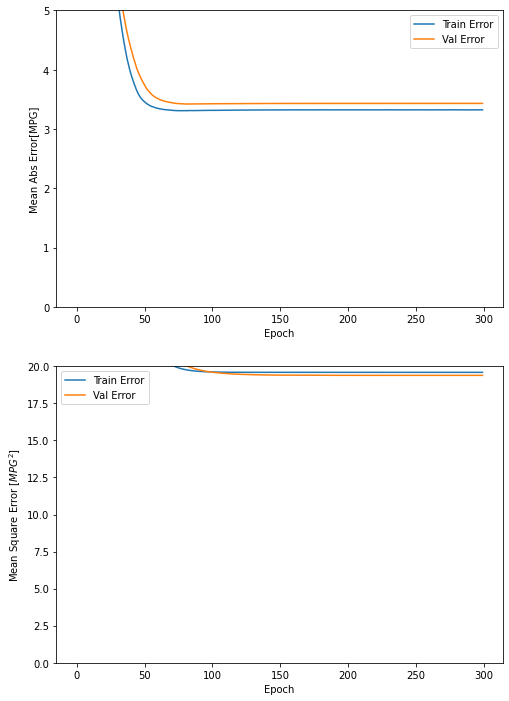

In [45]:
plt.figure( figsize = ( 8, 12 ) )
plt.subplot( 2, 1, 1 )
plt.xlabel( 'Epoch' )
plt.ylabel( 'Mean Abs Error[MPG]' )
plt.plot( hist[ 'epoch' ], hist[ 'mae' ], label = 'Train Error' )
plt.plot( hist[ 'epoch' ], hist[ 'val_mae' ], label = 'Val Error' )
plt.ylim( [ 0, 5 ] )
plt.legend()

plt.subplot( 2, 1, 2 )
plt.xlabel( 'Epoch' )
plt.ylabel( 'Mean Square Error [$MPG^2$]' )
plt.plot( hist[ 'epoch' ], hist[ 'mse' ], label = 'Train Error' )
plt.plot( hist[ 'epoch' ], hist[ 'val_mse' ], label = 'Val Error' )
plt.ylim( [ 0, 20 ] )
plt.legend()

plt.show()

## 5. 평가

In [46]:
loss, mae, mse = model.evaluate( X_test, y_test, verbose = 2 )

print( "테스트 세트의 평균 절대 오차: {:5.2f} MPG".format( mae ) )

78/1 - 0s - loss: 19.3621 - mse: 15.3819 - mae: 2.9253
테스트 세트의 평균 절대 오차: 15.38 MPG


## 6. 예측

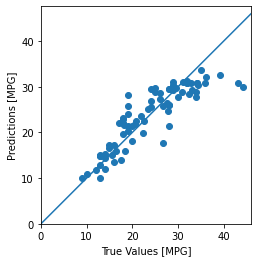

In [47]:
test_predictions = model.predict( X_test ).flatten()

plt.scatter( y_test, test_predictions)
plt.xlabel( 'True Values [MPG]' )
plt.ylabel( 'Predictions [MPG]' )
plt.axis( 'equal' )
plt.axis( 'square' )
plt.xlim( [ 0, plt.xlim()[ 1 ] ] )
plt.ylim( [ 0, plt.ylim()[ 1 ] ] )
_ = plt.plot( [ - 100, 100 ], [ -100, 100 ] )

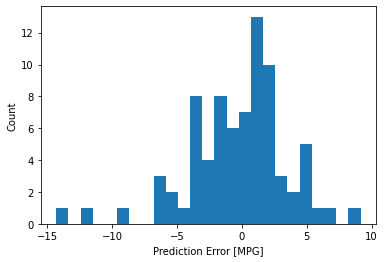

In [48]:
error = test_predictions - y_test
plt.hist( error, bins = 25 )
plt.xlabel( "Prediction Error [MPG]" )
_ = plt.ylabel( "Count" )

# 다중 선형 회귀 모델

## 4. 모델 학습

### 훈련 / 테스트 데이터 NumPy  배열로 변환

In [49]:
X_train = np.asarray( normed_train_df[ [ 'ho rsepower', 'weight' ] ] ) 
X_test = np.asarray( normed_test_df[ [ 'horsepower', 'weight' ] ] )

In [50]:
print( len( X_train ), len( X_test ) )

314 78


In [51]:
print( len( y_train ), len( y_test ) )

314 78


### Scikit-learn 사용

In [52]:
model = LinearRegression()
model.fit( X_train, y_train )

LinearRegression()

In [53]:
r_square = model.score( X_test, y_test ) # 결정계수( R-제곱 ) 계산
print( '결정계수( R-제곱 ) : {}'.format( r_square ) )

결정계수( R-제곱 ) : 0.7770419592858637


In [54]:
print( '회귀식의 기울기( W ) : {}'.format( model.coef_ ) )
print( '회귀식의 절편( b ) : {}'.format( model.intercept_ ) )

회귀식의 기울기( W ) : [-1.79863037 -4.79378522]
회귀식의 절편( b ) : 23.31050955414013


In [55]:
y_predict = model.predict( X_test )

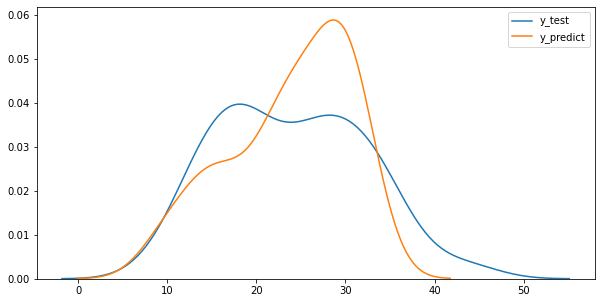

In [56]:
plt.figure( figsize = ( 10, 5 ) )
ax1 = sns.distplot( y_test, hist = False, label = 'y_test' )
ax2 = sns.distplot( y_predict, hist = False, label = 'y_predict', ax = ax1 )

plt.show()

### Keras 사용

In [57]:
X_train = np.array( X_train )
X_test = np.array( X_test )

In [58]:
model = Sequential()
model.add( Dense( 1, input_dim = 2, activation = 'linear' ) )
sgd = optimizers.SGD( lr = 0.0001 )
model.compile( optimizer = sgd ,loss = 'mse', metrics = [ 'mse', 'mae' ] )
history = model.fit( X_train, y_train, batch_size = 1, epochs = 300, validation_split = 0.2 )

Train on 251 samples, validate on 63 samples
Epoch 1/300
251/251 [==============================] - 1s 2ms/sample - loss: 591.6327 - mse: 591.6324 - mae: 22.6403 - val_loss: 586.2638 - val_mse: 586.2640 - val_mae: 22.5818
Epoch 2/300
251/251 [==============================] - 0s 1ms/sample - loss: 532.6899 - mse: 532.6898 - mae: 21.5273 - val_loss: 528.9808 - val_mse: 528.9808 - val_mae: 21.5077
Epoch 3/300
251/251 [==============================] - 0s 1ms/sample - loss: 480.0970 - mse: 480.0970 - mae: 20.4760 - val_loss: 477.8980 - val_mse: 477.8981 - val_mae: 20.4858
Epoch 4/300
251/251 [==============================] - 0s 1ms/sample - loss: 433.1247 - mse: 433.1247 - mae: 19.4740 - val_loss: 432.1706 - val_mse: 432.1706 - val_mae: 19.5137
Epoch 5/300
251/251 [==============================] - 0s 1ms/sample - loss: 391.1076 - mse: 391.1075 - mae: 18.5275 - val_loss: 391.2658 - val_mse: 391.2658 - val_mae: 18.5887
Epoch 6/300
251/251 [==============================] - 0s 1ms/sample -

Epoch 48/300
251/251 [==============================] - ETA: 0s - loss: 20.5482 - mse: 20.5482 - mae: 3.4030 - 0s 1ms/sample - loss: 23.8009 - mse: 23.8009 - mae: 3.5971 - val_loss: 25.4660 - val_mse: 25.4660 - val_mae: 3.9186
Epoch 49/300
251/251 [==============================] - 0s 1ms/sample - loss: 23.3573 - mse: 23.3573 - mae: 3.5605 - val_loss: 24.9266 - val_mse: 24.9266 - val_mae: 3.8717
Epoch 50/300
251/251 [==============================] - 1s 3ms/sample - loss: 22.9566 - mse: 22.9566 - mae: 3.5233 - val_loss: 24.4329 - val_mse: 24.4329 - val_mae: 3.8294
Epoch 51/300
251/251 [==============================] - 1s 3ms/sample - loss: 22.5941 - mse: 22.5941 - mae: 3.4971 - val_loss: 23.9799 - val_mse: 23.9799 - val_mae: 3.7891
Epoch 52/300
251/251 [==============================] - 1s 4ms/sample - loss: 22.2657 - mse: 22.2657 - mae: 3.4655 - val_loss: 23.5658 - val_mse: 23.5658 - val_mae: 3.7536
Epoch 53/300
251/251 [==============================] - 1s 3ms/sample - loss: 21.9674

Epoch 95/300
251/251 [==============================] - 0s 1ms/sample - loss: 19.0586 - mse: 19.0586 - mae: 3.2661 - val_loss: 18.7214 - val_mse: 18.7214 - val_mae: 3.4404
Epoch 96/300
251/251 [==============================] - 0s 1ms/sample - loss: 19.0515 - mse: 19.0515 - mae: 3.2670 - val_loss: 18.7035 - val_mse: 18.7035 - val_mae: 3.4393
Epoch 97/300
251/251 [==============================] - 0s 1ms/sample - loss: 19.0449 - mse: 19.0449 - mae: 3.2671 - val_loss: 18.6862 - val_mse: 18.6862 - val_mae: 3.4386
Epoch 98/300
251/251 [==============================] - 0s 995us/sample - loss: 19.0386 - mse: 19.0386 - mae: 3.2682 - val_loss: 18.6701 - val_mse: 18.6701 - val_mae: 3.4381
Epoch 99/300
251/251 [==============================] - 0s 1ms/sample - loss: 19.0327 - mse: 19.0327 - mae: 3.2675 - val_loss: 18.6547 - val_mse: 18.6547 - val_mae: 3.4376
Epoch 100/300
251/251 [==============================] - 0s 1ms/sample - loss: 19.0270 - mse: 19.0270 - mae: 3.2671 - val_loss: 18.6399 - 

251/251 [==============================] - 0s 1ms/sample - loss: 18.9083 - mse: 18.9083 - mae: 3.2708 - val_loss: 18.3816 - val_mse: 18.3816 - val_mae: 3.4220
Epoch 143/300
251/251 [==============================] - 0s 992us/sample - loss: 18.9066 - mse: 18.9066 - mae: 3.2703 - val_loss: 18.3788 - val_mse: 18.3788 - val_mae: 3.4217
Epoch 144/300
251/251 [==============================] - 0s 1ms/sample - loss: 18.9049 - mse: 18.9049 - mae: 3.2692 - val_loss: 18.3768 - val_mse: 18.3768 - val_mae: 3.4214
Epoch 145/300
251/251 [==============================] - 0s 1ms/sample - loss: 18.9033 - mse: 18.9033 - mae: 3.2694 - val_loss: 18.3746 - val_mse: 18.3746 - val_mae: 3.4211
Epoch 146/300
251/251 [==============================] - 1s 2ms/sample - loss: 18.9018 - mse: 18.9018 - mae: 3.2702 - val_loss: 18.3727 - val_mse: 18.3727 - val_mae: 3.4208
Epoch 147/300
251/251 [==============================] - 1s 2ms/sample - loss: 18.9000 - mse: 18.9000 - mae: 3.2722 - val_loss: 18.3705 - val_mse: 

251/251 [==============================] - 0s 1ms/sample - loss: 18.8512 - mse: 18.8512 - mae: 3.2694 - val_loss: 18.3263 - val_mse: 18.3263 - val_mae: 3.4154
Epoch 190/300
251/251 [==============================] - 0s 999us/sample - loss: 18.8503 - mse: 18.8503 - mae: 3.2680 - val_loss: 18.3260 - val_mse: 18.3260 - val_mae: 3.4155
Epoch 191/300
251/251 [==============================] - 0s 1ms/sample - loss: 18.8493 - mse: 18.8493 - mae: 3.2670 - val_loss: 18.3256 - val_mse: 18.3256 - val_mae: 3.4155
Epoch 192/300
251/251 [==============================] - 0s 994us/sample - loss: 18.8486 - mse: 18.8486 - mae: 3.2698 - val_loss: 18.3247 - val_mse: 18.3247 - val_mae: 3.4154
Epoch 193/300
251/251 [==============================] - 0s 1ms/sample - loss: 18.8478 - mse: 18.8478 - mae: 3.2677 - val_loss: 18.3241 - val_mse: 18.3241 - val_mae: 3.4154
Epoch 194/300
251/251 [==============================] - 0s 988us/sample - loss: 18.8471 - mse: 18.8471 - mae: 3.2689 - val_loss: 18.3233 - val_m

251/251 [==============================] - 0s 1000us/sample - loss: 18.8218 - mse: 18.8218 - mae: 3.2666 - val_loss: 18.3138 - val_mse: 18.3138 - val_mae: 3.4146
Epoch 237/300
251/251 [==============================] - 0s 995us/sample - loss: 18.8213 - mse: 18.8213 - mae: 3.2676 - val_loss: 18.3136 - val_mse: 18.3136 - val_mae: 3.4145
Epoch 238/300
251/251 [==============================] - 0s 1ms/sample - loss: 18.8209 - mse: 18.8209 - mae: 3.2687 - val_loss: 18.3133 - val_mse: 18.3133 - val_mae: 3.4144
Epoch 239/300
251/251 [==============================] - 0s 2ms/sample - loss: 18.8206 - mse: 18.8206 - mae: 3.2674 - val_loss: 18.3133 - val_mse: 18.3133 - val_mae: 3.4144
Epoch 240/300
251/251 [==============================] - 0s 2ms/sample - loss: 18.8202 - mse: 18.8202 - mae: 3.2662 - val_loss: 18.3133 - val_mse: 18.3134 - val_mae: 3.4144
Epoch 241/300
251/251 [==============================] - 1s 2ms/sample - loss: 18.8197 - mse: 18.8197 - mae: 3.2670 - val_loss: 18.3131 - val_ms

251/251 [==============================] - 0s 1ms/sample - loss: 18.8063 - mse: 18.8063 - mae: 3.2662 - val_loss: 18.3105 - val_mse: 18.3105 - val_mae: 3.4135
Epoch 284/300
251/251 [==============================] - 0s 1ms/sample - loss: 18.8065 - mse: 18.8065 - mae: 3.2632 - val_loss: 18.3108 - val_mse: 18.3108 - val_mae: 3.4136
Epoch 285/300
251/251 [==============================] - 0s 1ms/sample - loss: 18.8063 - mse: 18.8063 - mae: 3.2632 - val_loss: 18.3112 - val_mse: 18.3113 - val_mae: 3.4137
Epoch 286/300
251/251 [==============================] - 0s 1ms/sample - loss: 18.8060 - mse: 18.8060 - mae: 3.2664 - val_loss: 18.3116 - val_mse: 18.3116 - val_mae: 3.4136
Epoch 287/300
251/251 [==============================] - 0s 1ms/sample - loss: 18.8059 - mse: 18.8059 - mae: 3.2648 - val_loss: 18.3116 - val_mse: 18.3116 - val_mae: 3.4136
Epoch 288/300
251/251 [==============================] - 0s 1000us/sample - loss: 18.8057 - mse: 18.8057 - mae: 3.2654 - val_loss: 18.3114 - val_mse:

In [59]:
history_dict = history.history
loss = history_dict[ 'loss' ]
val_loss = history_dict[ 'val_loss' ]

epochs = range( 1, len( loss ) + 1 )

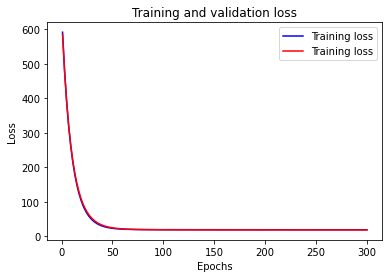

In [60]:
plt.plot( epochs, loss, 'b', label = 'Training loss' )
plt.plot( epochs, val_loss, 'r', label = 'Training loss' )
plt.title( 'Training and validation loss' )
plt.xlabel( 'Epochs' )
plt.ylabel( 'Loss' )
plt.legend()

plt.show()

In [61]:
hist = pd.DataFrame(history.history)
hist[ 'epoch' ] = history.epoch
hist.tail()

,loss,mse,mae,val_loss,val_mse,val_mae,epoch
295,18.804098,18.804100,3.264735,18.312483,18.312485,3.413757,295
296,18.803891,18.803900,3.264923,18.312560,18.312559,3.413731,296
297,18.803665,18.803659,3.263157,18.312529,18.312527,3.413767,297
298,18.803454,18.803455,3.265909,18.312466,18.312471,3.413689,298
299,18.803327,18.803329,3.264170,18.312201,18.312201,3.413675,299


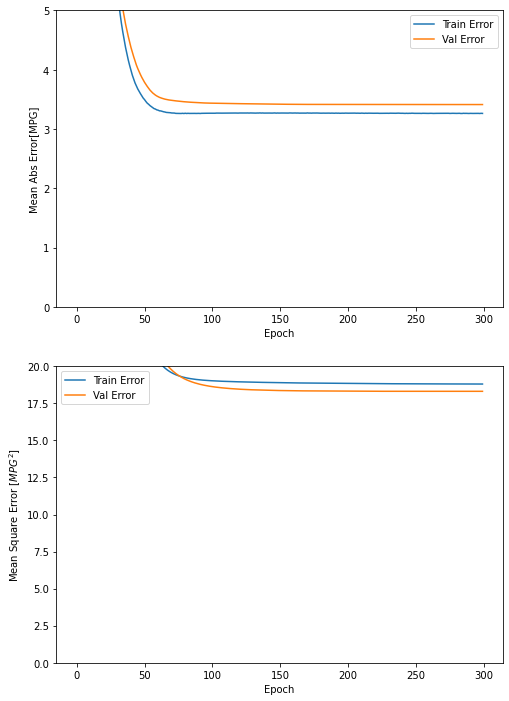

In [62]:
plt.figure( figsize = ( 8, 12 ) )
plt.subplot( 2, 1, 1 )
plt.xlabel( 'Epoch' )
plt.ylabel( 'Mean Abs Error[MPG]' )
plt.plot( hist[ 'epoch' ], hist[ 'mae' ], label = 'Train Error' )
plt.plot( hist[ 'epoch' ], hist[ 'val_mae' ], label = 'Val Error' )
plt.ylim( [ 0, 5 ] )
plt.legend()

plt.subplot( 2, 1, 2 )
plt.xlabel( 'Epoch' )
plt.ylabel( 'Mean Square Error [$MPG^2$]' )
plt.plot( hist[ 'epoch' ], hist[ 'mse' ], label = 'Train Error' )
plt.plot( hist[ 'epoch' ], hist[ 'val_mse' ], label = 'Val Error' )
plt.ylim( [ 0, 20 ] )
plt.legend()

plt.show()

# 5. 평가

In [63]:
loss, mae, mse = model.evaluate( X_test, y_test, verbose = 2 )

print( "테스트 세트의 평균 절대 오차: {:5.2f} MPG".format( mae ) )

78/1 - 0s - loss: 17.4353 - mse: 14.6300 - mae: 2.9258
테스트 세트의 평균 절대 오차: 14.63 MPG


# 6. 예측

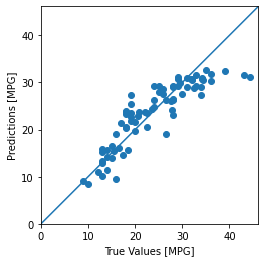

In [64]:
test_predictions = model.predict( X_test ).flatten()

plt.scatter( y_test, test_predictions)
plt.xlabel( 'True Values [MPG]' )
plt.ylabel( 'Predictions [MPG]' )
plt.axis( 'equal' )
plt.axis( 'square' )
plt.xlim( [ 0, plt.xlim()[ 1 ] ] )
plt.ylim( [ 0, plt.ylim()[ 1 ] ] )
_ = plt.plot( [ - 100, 100 ], [ -100, 100 ] )

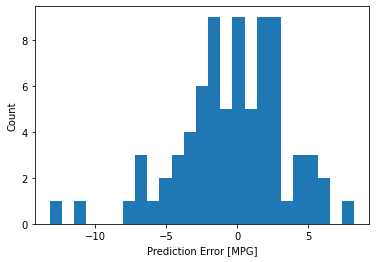

In [65]:
error = test_predictions - y_test
plt.hist( error, bins = 25 )
plt.xlabel( "Prediction Error [MPG]" )
_ = plt.ylabel( "Count" )